/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


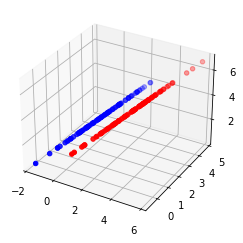

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree

# Set the mean and covariance matrix for each Gaussian distribution
mean1 = [1, 2, 3]
# covariance1 = np.array([[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]])
# covariance1 = np.array([[1,0, 0], [0, 1, 0], [0, 0, 1]])
covariance1 = np.ones((3,3))
# covariance1 = np.identity(3)

# mean2 = [5, 6, 7]
mean2 = [3, 2, 4]
# covariance2 = np.array([[1, 0, 0], [0, 2, 0.5], [0, 0.5, 1]])
covariance2 = np.ones((3,3))
# covariance2 = np.identity(3)


# # Set the mean and covariance matrix for each Gaussian distribution
# mean1 = [1, 2, 3]
# # mean1 = [1, 0, 0]

# # covariance1 = np.ones((3,3))
# covariance1 = np.array([[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]])
# # covariance1 = np.array([[1,0, 0], [0, 1, 0], [0, 0, 1]])

# mean2 = [5, 6, 7]
# # mean2 = [0, 0, 0]
# # covariance2 = np.ones((3,3))
# covariance2 = np.array([[1, 0, 0], [0, 2, 0.5], [0, 0.5, 1]])


# Set the number of samples
n0 = 100
n1 = 100

# Generate random samples from the multivariate normal distributions
data1 = np.random.multivariate_normal(mean1, covariance1, n0)
data2 = np.random.multivariate_normal(mean2, covariance2, n1)

# Concatenate the datasets
dataset = np.concatenate([data1, data2])

# Shuffle the dataset
np.random.shuffle(dataset)

# Visualize the dataset (optional)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], marker='o')
ax.scatter(data1[:, 0], data1[:, 1], data1[:, 2], marker='o', c='b')
ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], marker='o', c = 'r')

plt.show()

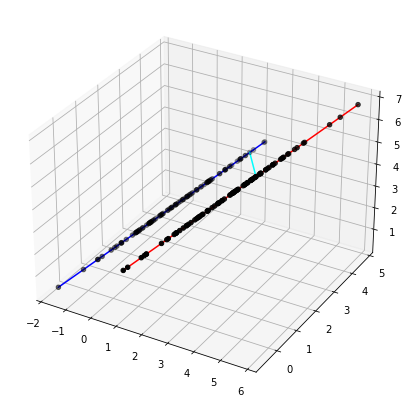

Frieman-Rafsky statistic =  1


In [2]:
FR_statistic =  0 

# Calculate pairwise distances

distances = distance.pdist(dataset)

# Create a square distance matrix
dist_matrix = distance.squareform(distances)

# Create a minimum spanning tree
mst = minimum_spanning_tree(dist_matrix)

# Extract edges from the minimum spanning tree
edges = np.array(np.where(mst.toarray() > 0)).T

# Plot the dataset and the minimum spanning tree
fig = plt.figure(figsize = (7,11), )
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c='black', marker='o')

for edge in edges:
    if dataset[edge[0]] in data1 and dataset[edge[1]] in data1:
        color = 'blue'
    elif dataset[edge[0]] in data2 and dataset[edge[1]] in data2:
        color = 'red'
    else:
        color = 'cyan'
        FR_statistic  +=1
        
    ax.plot(dataset[edge, 0], dataset[edge, 1], dataset[edge, 2], c=color)

plt.show()
print("Frieman-Rafsky statistic = ",  FR_statistic )

In [3]:
Dp = 1 - FR_statistic * (n0 + n1)/ (2 * n0 * n1)

print("The Dp measure is, ", Dp)

The Dp measure is,  0.99


In [4]:
p = n0 /(n0 + n1)
q = n1 / (n0 + n1)

up = 4 * p * q * Dp + (p-q)**2



val1 = 1 / 2 * ( up**(1/2)) 

print("Baye's error rate is between", 1/2 - val1, 1/2 -  1/2 * up )

Baye's error rate is between 0.0025062814466900174 0.0050000000000000044


In [5]:
from scipy.stats import multivariate_normal

# Assuming you have the generated dataset 'dataset' and the means and covariances for each class


# Create multivariate normal distributions for each class
class1_distribution = multivariate_normal(mean1, covariance1)
class2_distribution = multivariate_normal(mean2, covariance2)

# Estimate the Bayes error rate
accuracy = (
    class1_distribution.cdf(data1).mean() +  # Probability of correctly classifying Class 1
    (  class2_distribution.cdf(data2)).mean()  # Probability of correctly classifying Class 2
) / 2

print(accuracy)

error_rate = 1 - accuracy



print(f"Estimated Bayes error rate: { error_rate}")

LinAlgError: singular matrix